In [1108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures, FunctionTransformer, LabelEncoder, PowerTransformer, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, precision_recall_curve, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance
from sklearn import metrics
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import norm,skew
from pandas.plotting import scatter_matrix

# Modelos:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
#from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import TomekLinks

In [1109]:
# Si se desean comentar algunos de los Warnings.
import warnings
warnings.filterwarnings('ignore')

In [1110]:
# Se carga el archivo con el separador correcto (punto y coma)
data_path = "C:/Users/michd/OneDrive/Escritorio/Maestría/Materias/MLOps/Actividad 2/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv"
df = pd.read_csv(data_path, sep=';', engine='python')

## Manipulación y preparación de datos

In [1111]:
# Se muestran los primeros registros
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [1112]:
# Se valida si hay valores nulos
df.isnull().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [1113]:
# Se muestra el tamaño del dataframe y el tipo de datos por columna
print(f"Dataframe shape: {df.shape}\n")
df.info()

Dataframe shape: (135, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int

In [1114]:
# Se debe reemplazar el delimitador de variable objetivo por . para convertir a tipo numerico
df['Slowness in traffic (%)'] = df['Slowness in traffic (%)'].str.replace(',', '.')

# Se debe convertir la variable objetivo a tipo numérico
df['Slowness in traffic (%)'] = pd.to_numeric(df['Slowness in traffic (%)'], errors='coerce')
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [1115]:
# Diccionario para decodificar las horas codificadas de acuerdo al documento de referencia con extensión .arff (Formato de archivo de relación de atributos)
Hours = {
    1: "7:00", 2: "7:30", 3: "8:00", 4: "8:30", 5: "9:00", 6: "9:30", 7: "10:00", 
    8: "10:30", 9: "11:00", 10: "11:30", 11: "12:00", 12: "12:30", 13: "13:00", 
    14: "13:30", 15: "14:00", 16: "14:30", 17: "15:00", 18: "15:30", 19: "16:00", 
    20: "16:30", 21: "17:00", 22: "17:30", 23: "18:00", 24: "18:30", 25: "19:00",
    26: "19:30", 27: "20:00"
}

# Se decodifica la columna 'Hour (Coded)' usando el diccionario de horas
df['Hour_decoded'] = df['Hour (Coded)'].map(Hours)

# Se mueve la columna 'Hour_decoded' al principio
df = df[['Hour_decoded'] + [col for col in df.columns if col != 'Hour_decoded']]

# Para imprimir el datafarame por conjunto de datos para ver los días
posiciones = [0, 1, 2, 27, 28, 29, 54, 55, 56, 81, 82, 83, 108, 109, 110]
df_filtrado = df.iloc[posiciones]
df_filtrado


,Hour_decoded,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,7:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,7:30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,8:00,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
27,7:00,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4.9
28,7:30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3
29,8:00,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0
54,7:00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.4
55,7:30,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8
56,8:00,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.3
81,7:00,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,4.0


In [1116]:
# Diccionario para ordenar los datos por los días de la semana de acuerdo al documento de referencia con extensión .arff (Formato de archivo de relación de atributos)
Monday  = 26
Tuesday = 53
Wednesday = 80
Thursday = 107
Friday = 134
Days_to_code = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5}

# Se debe crear la columna de Día y asignar un día de la semana al conjunto de datos. 
# Son 5 conjuntos de datos de acuerdo a los horarios (de 7am a 8pm) y podemos asumir que las lecturas son de Lunes a Viernes
def transform_days(df, create_column=False, to_numerical=False):
    if create_column:
        df['Day'] = '0'

    position=-1
    if to_numerical is False:
        for idx in df.index:
            if idx <= Monday:
                df.iloc[idx, position] = 'Monday'
            elif idx <= Tuesday:
                df.iloc[idx, position] = 'Tuesday'
            elif idx <= Wednesday:
                df.iloc[idx, position] = 'Wednesday'
            elif idx <= Thursday:
                df.iloc[idx, position] = 'Thursday'
            elif idx <= Friday:
                df.iloc[idx, position] = 'Friday'
    else:
        df_values = df["Day"].unique()
        for key, value in Days_to_code.items():
            assert key in df_values, "First transform your data into weekday by setting to_numerical=False, then apply the numerical transformation"
            df.loc[(df.Day == key), 'Day'] = value
        df['Day'] = df['Day'].astype(int)
        
transform_days(df, create_column=True)

# Se mueve la columna 'Day' al principio
df = df[['Day'] + [col for col in df.columns if col != 'Day']]

# Para imprimir el datafarame por conjunto de datos para ver los días
df_filtrado = df.iloc[posiciones]
df_filtrado

,Day,Hour_decoded,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,Monday,7:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,Monday,7:30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,Monday,8:00,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
27,Tuesday,7:00,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4.9
28,Tuesday,7:30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3
29,Tuesday,8:00,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0
54,Wednesday,7:00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.4
55,Wednesday,7:30,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8
56,Wednesday,8:00,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.3
81,Thursday,7:00,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,4.0


## Exploración y preprocesamiento de datos

In [1117]:
# Se muestran los resultados estadísticos del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour (Coded),135.0,14.000000,7.817890,1.0,7.0,14.0,21.00,27.0
Immobilized bus,135.0,0.340741,0.659749,0.0,0.0,0.0,1.00,4.0
Broken Truck,135.0,0.874074,1.102437,0.0,0.0,1.0,1.00,5.0
Vehicle excess,135.0,0.029630,0.170195,0.0,0.0,0.0,0.00,1.0
Accident victim,135.0,0.422222,0.696116,0.0,0.0,0.0,1.00,3.0
Running over,135.0,0.118519,0.346665,0.0,0.0,0.0,0.00,2.0
Fire vehicles,135.0,0.007407,0.086066,0.0,0.0,0.0,0.00,1.0
Occurrence involving freight,135.0,0.007407,0.086066,0.0,0.0,0.0,0.00,1.0
Incident involving dangerous freight,135.0,0.007407,0.086066,0.0,0.0,0.0,0.00,1.0
Lack of electricity,135.0,0.118519,0.504485,0.0,0.0,0.0,0.00,4.0


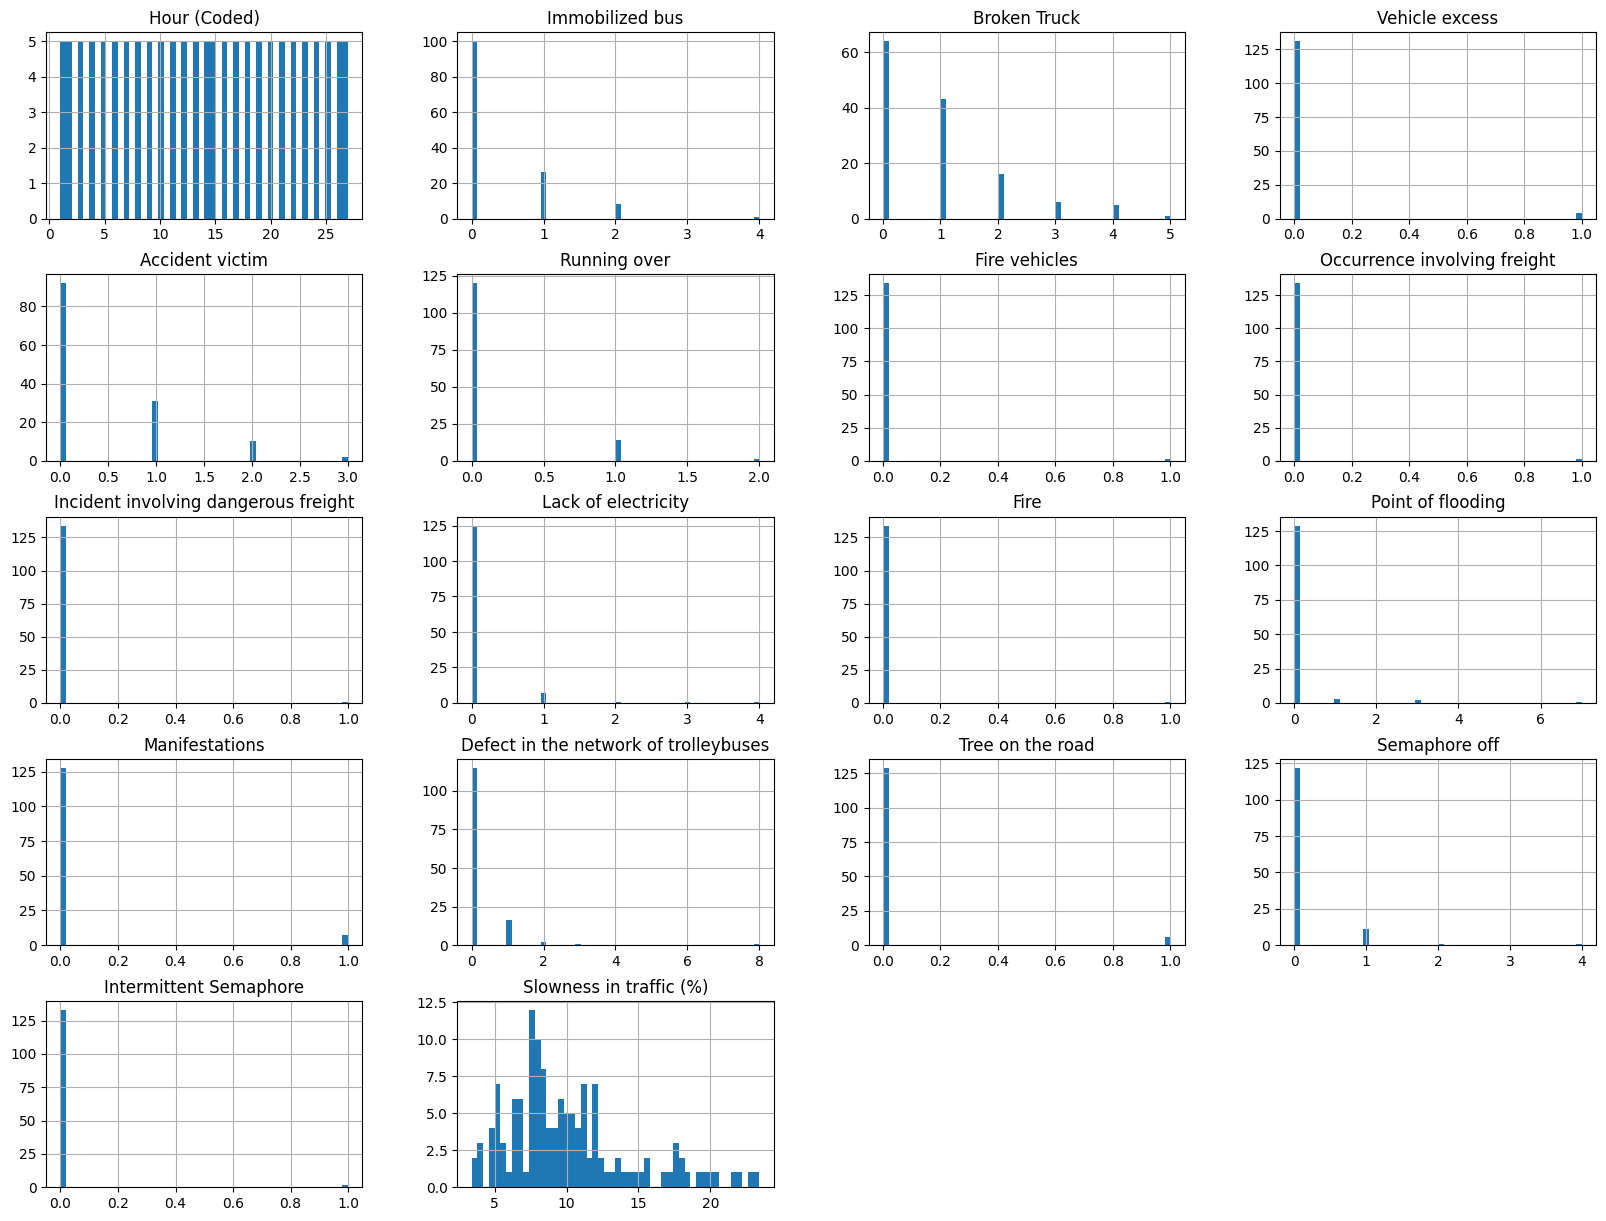

In [1118]:
# Histogramas de variables
df.hist(bins=50, figsize=(20, 15))
plt.show()

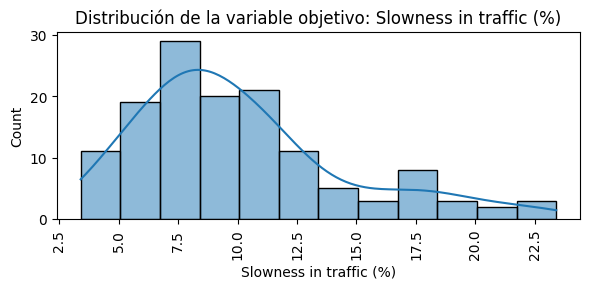

In [1119]:
# Distribucion de la variable Objetivo
plt.figure(figsize=(6, 3))
sns.histplot(df['Slowness in traffic (%)'], kde=True)
plt.title('Distribución de la variable objetivo: Slowness in traffic (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

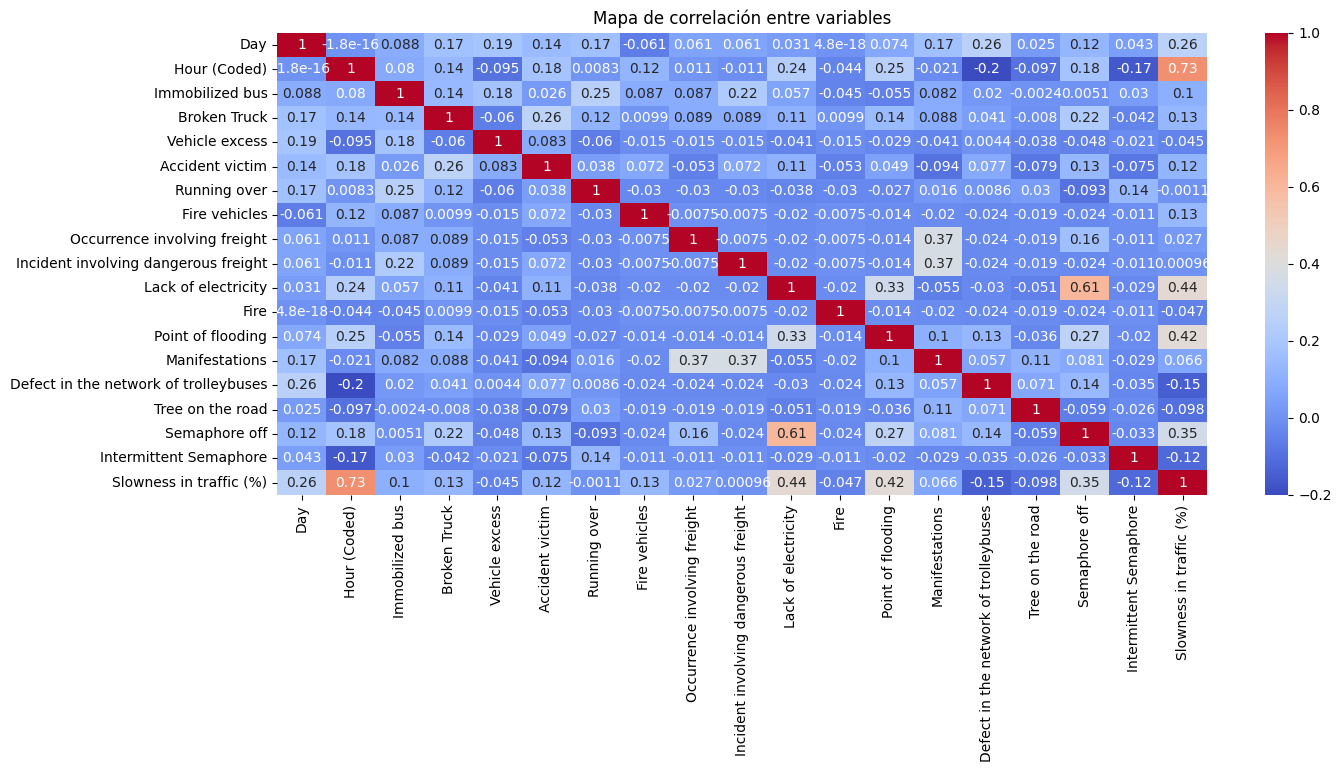

In [1120]:
transform_days(df, to_numerical=True)
numeric_df = df.select_dtypes(include=[np.number])

# Mapa de calor con las correlaciones
plt.figure(figsize=(15, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación entre variables')
plt.show()

In [1121]:
# Matriz de correlación de variables para lentitud del tráfico
corr_matrix = numeric_df.corr()
corr_matrix['Slowness in traffic (%)'].sort_values(ascending=False)

Slowness in traffic (%)                  1.000000
Hour (Coded)                             0.729962
Lack of electricity                      0.436569
Point of flooding                        0.420016
Semaphore off                            0.347242
Day                                      0.261948
Fire vehicles                            0.134103
Broken Truck                             0.131998
Accident victim                          0.121730
Immobilized bus                          0.101143
Manifestations                           0.066377
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Running over                            -0.001133
Vehicle excess                          -0.045297
Fire                                    -0.046737
Tree on the road                        -0.098489
Intermittent Semaphore                  -0.119942
Defect in the network of trolleybuses   -0.147035
Name: Slowness in traffic (%), dtype: float64

array([[<Axes: xlabel='Slowness in traffic (%)', ylabel='Slowness in traffic (%)'>,
        <Axes: xlabel='Hour (Coded)', ylabel='Slowness in traffic (%)'>],
       [<Axes: xlabel='Slowness in traffic (%)', ylabel='Hour (Coded)'>,
        <Axes: xlabel='Hour (Coded)', ylabel='Hour (Coded)'>]],
      dtype=object)

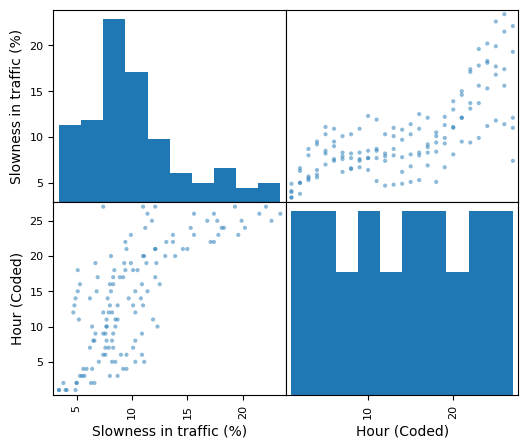

In [1122]:
# Scatterplot de relación para ver cómo afecta la hora del día a la lentitud del tráfico
atributos = ["Slowness in traffic (%)", "Hour (Coded)"]
scatter_matrix(df[atributos], figsize=(6, 5))

array([[<Axes: xlabel='Slowness in traffic (%)', ylabel='Slowness in traffic (%)'>,
        <Axes: xlabel='Lack of electricity', ylabel='Slowness in traffic (%)'>],
       [<Axes: xlabel='Slowness in traffic (%)', ylabel='Lack of electricity'>,
        <Axes: xlabel='Lack of electricity', ylabel='Lack of electricity'>]],
      dtype=object)

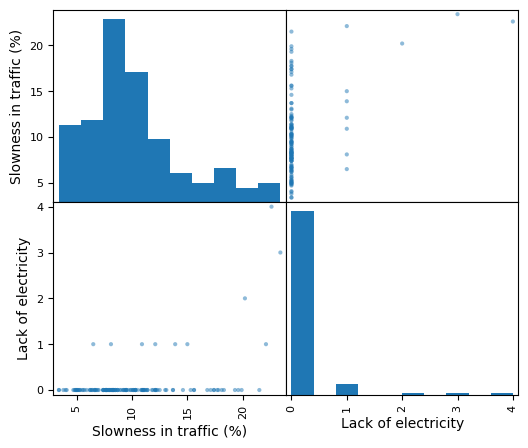

In [1123]:
# Scatterplot de relación para ver cómo afecta la falta de luz a la lentitud del tráfico. 
# Asumimos, por la distribución de los histogramas, que el siguiente plot se debe ver igual al "punto de inundación" y al "semáforo apagado"
atributos2 = ["Slowness in traffic (%)", "Lack of electricity"]
scatter_matrix(df[atributos2], figsize=(6, 5))

In [1124]:
# Se muestra la media de la lentitud en el tráfico por día
df.groupby('Day')['Slowness in traffic (%)'].mean()

Day
1     7.722222
2     9.788889
3    10.681481
4    10.848148
5    11.218519
Name: Slowness in traffic (%), dtype: float64

## Construcción, ajuste y evaluación de Modelos de Machine Learning

In [1125]:
# Se debe eliminar la columna de horas decodificada y validar que todas las columnas son de tipo numérico
df = df.drop(columns = ['Hour_decoded'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Day                                    135 non-null    int32  
 1   Hour (Coded)                           135 non-null    int64  
 2   Immobilized bus                        135 non-null    int64  
 3   Broken Truck                           135 non-null    int64  
 4   Vehicle excess                         135 non-null    int64  
 5   Accident victim                        135 non-null    int64  
 6   Running over                           135 non-null    int64  
 7   Fire vehicles                          135 non-null    int64  
 8   Occurrence involving freight           135 non-null    int64  
 9   Incident involving dangerous freight   135 non-null    int64  
 10  Lack of electricity                    135 non-null    int64  
 11  Fire  

In [1126]:
# Se dividen los datos en entrenamiento y prueba (80% y 20% respectivamente)
y = df['Slowness in traffic (%)']
X = df.drop(columns='Slowness in traffic (%)')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, stratify=df["Hour (Coded)"], random_state=42)
print('Dimensión de Entrenamiento: (X_train), (y_train) = ', Xtrain.shape, ytrain.shape)
print('Dimensión de Prueba: (X_test), (y_test) = ', Xtest.shape, ytest.shape)

Dimensión de Entrenamiento: (X_train), (y_train) =  (108, 18) (108,)
Dimensión de Prueba: (X_test), (y_test) =  (27, 18) (27,)


In [1127]:
# Se aplican las transformaciones pertinentes a las variables numéricas de acuerdo a lo observado en los histogramas.
num_pipe = Pipeline([
    ("log_transform", FunctionTransformer(np.log1p)),
    ('z-score', StandardScaler())
])

num_pipe_nombres = Xtrain.select_dtypes(include=np.number).columns.tolist()
columnasTransformer = ColumnTransformer([('num', num_pipe, num_pipe_nombres)], remainder = 'passthrough')

In [1128]:
# Ya está listo el conjunto para entrenar
X_train_models = columnasTransformer.fit_transform(Xtrain)

In [1129]:
# Se definen a continuación todos los modelos que se van a comparar
def mis_modelos():
  modelos, nombres = list(), list()

# -------------------------------------   MODELOS   ------------------------------------------------------------------

  # Regresión Logística - Logistic Regression-LR:
  modelos.append(LinearRegression(#max_iter = 10,    # 10, 100, 1000
                                    #C = 1.0,          # 0.000001, 0.005, 0.01,  1000
                                    #random_state = 1  # 2
                                    ))
  nombres.append('LR')

# -------------------------------------------------------------------------------------------------------

  # k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
  modelos.append(KNeighborsRegressor(#n_neighbors = 5,      # 1, 5, 21, 201
                                      ))
  nombres.append('kNN')

# -------------------------------------------------------------------------------------------------------

  # Árbol de decisiones-DecisionTree-DT:
  modelos.append(DecisionTreeRegressor(#max_depth = None,        # None, 5, 3, 1  #Profunidad del árbol. Entre más grande, mayor sobreentrenamiento.
                                        #min_samples_split = 2,   # 2,3,5, 20  #Observaciones en un nodo. Menor valor, mayor sobreentrenamiento.
                                        #min_samples_leaf = 1,   # Usar solo uno de estos, split o leaf, para su comprensión. Observaciones en cada hoja. Menor cantidad, mayor sobreentrenamiento.
                                        #ccp_alpha = ,    #Evita el sobreentrenamiento (parecido a L1). Mayor valor, mayor podado (pruning).
                                        #random_state = 7
                                        ))
  nombres.append('DTree')

# -------------------------------------------------------------------------------------------------------

  # Bosque Aleatorio-RandomForest-RF:
  modelos.append(RandomForestRegressor(#n_estimators = 100,       # 100   # número de árboles en el Forest y después promedia por votación
                                        #max_depth = None,         # None, 1, 2, 3, 4, 5, 6   # Depth=k : máximo 2^k líneas/ramas.
                                        #min_samples_split = 2,    # 2, 5, 15    # mínimo de puntos muestrales en un nodo para ramificación. Puede ser fracción de 0 a 1.
                                        #criterion='gini',   # métrica para determinar las ramas. También puede ser: 'entropy', para la GananciaDeInformación (IG).
                                        #min_samples_leaf = 4,  # mínimo de puntos muestrales que deben quedar en cada nueva ramificación (hojas). Puede ser fracción de 0 a 1.
                                        #max_features= 'auto',   # número de características (features) que se consideran en cada ramificación: auto=sqrt(n_features).
                                        #max_leaf_nodes=16,  # solo nos quedamos con las mejores k hojas.
                                        #bootstrap=True,  # Cada Árbol se muestrea seleccionando la cantidad de datos del conjunto de entrenamiento, pero con reemplazo. False:los datos usados en cada árbol simpre es el mismo, el Train-set.
                                        #oob_score=True,  # en caso de utilizar Out-of-bag samples.
                                        #verbose=0,     # tipo de despliega de información durante el entrenamiento.
                                        #n_jobs=-1,    # total de hilos a usar en las rutinas paralelizables: "-1" :usar todos los posibles.
                                        #max_samples=None,   # Cuando se usa Boostrap, es el total de datos de Xtrain a usar en cada árbol. "None" usará Xtrain[0].
                                        #random_state = 0
                                        ))
  nombres.append('RF')

# -------------------------------------------------------------------------------------------------------

  # XGBoosting:
  modelos.append(XGBRegressor(#booster = 'gbtree',
                               #n_estimators = 100,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               #max_depth = 6,             # 1,3, 6,
                               #learning_rate = 0.3,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               #subsample = 1.0,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               #random_state = 5,
                               #objective = 'reg:squarederror',
                               #n_jobs = -1
                               ))
  nombres.append('XGBoost')

# -------------------------------------------------------------------------------------------------------

  # Máquina de Vectores de Soporte-SVM:
  modelos.append(SVR(#kernel = 'rbf',
                     #C = 1.0,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     #gamma = 'scale',           # scale,  0.005
                     #class_weight = 'balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     #random_state = 7
                     ))
  nombres.append('SVR')

# -------------------------------------------------------------------------------------------------------

  return modelos, nombres



# Se entrena cada uno de los modelos y se muestran la métricas de entrenamiento
modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Se define el pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Se aplica la validación-cruzada:
  micv = RepeatedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # Se agrega una semilla para estabilizar resultados
                                 )


  # Se definen las métricas a obtener:
  # MSE: Cuanto más cercano a 0 (menos negativo), mejor
  # MAE:Cuanto más cercano a 0 (menos negativo), mejor
  # R2: Cuanto más cercano a 1, mejor 
  # RMSE: Cuanto más cercano a 0 (menos negativo), mejor
  mismetricas = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2','neg_root_mean_squared_error']

  # Se realiza el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrain,
                          ytrain,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Se guarda el resultado de cada modelo para comparar métricas
  resultados.append(scores)

  # Se muestran los valores de las métricas
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_neg_mean_squared_error -11.693 (8.458)
	 train_neg_mean_squared_error -6.055 (0.439)
	 test_neg_mean_absolute_error -2.652 (0.724)
	 train_neg_mean_absolute_error -1.927 (0.102)
	 test_r2 0.329 (0.321)
	 train_r2 0.677 (0.022)
	 test_neg_root_mean_squared_error -3.288 (0.940)
	 train_neg_root_mean_squared_error -2.459 (0.090)
>> kNN
	 test_neg_mean_squared_error -12.627 (4.458)
	 train_neg_mean_squared_error -7.582 (0.505)
	 test_neg_mean_absolute_error -2.664 (0.480)
	 train_neg_mean_absolute_error -2.068 (0.068)
	 test_r2 0.264 (0.178)
	 train_r2 0.594 (0.045)
	 test_neg_root_mean_squared_error -3.500 (0.617)
	 train_neg_root_mean_squared_error -2.752 (0.092)
>> DTree
	 test_neg_mean_squared_error -5.028 (2.017)
	 train_neg_mean_squared_error 0.000 (0.000)
	 test_neg_mean_absolute_error -1.671 (0.315)
	 train_neg_mean_absolute_error 0.000 (0.000)
	 test_r2 0.705 (0.088)
	 train_r2 1.000 (0.000)
	 test_neg_root_mean_squared_error -2.197 (0.447)
	 train_neg_root_mean_squar

/// De acuerdo a los resultados anteriores, se puede concluir que XBoost, RandomForest y DecisionTree (en ese orden), son los modelos con mejor rendimiento.

/// Ahora se buscarán los mejores parámetros para estos modelos.

In [1130]:
modeloXGB = XGBRegressor()

param_grid = [{
    'max_depth': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 1, 5],
    'subsample': [0.1, 0.3, 0.5, 0.7, 1]
}]

grid_search = GridSearchCV(modeloXGB, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(Xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados para XGBoost:", best_params)

Mejores hiperparámetros encontrados para XGBoost: {'learning_rate': 0.3, 'max_depth': 10, 'subsample': 0.7}


In [1131]:
train_metricas = best_model.predict(Xtrain)
rmse = np.sqrt(mean_squared_error(ytrain, train_metricas))
mae = mean_absolute_error(ytrain, train_metricas)
r2 = r2_score(ytrain, train_metricas)

print("Métricas en el conjunto de entrenamiento de XGBoost:")
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R²: ", r2)

Métricas en el conjunto de entrenamiento de XGBoost:
RMSE:  0.0009296607455124428
MAE:  0.0007104282025937254
R²:  0.9999999542264998


In [1132]:
modeloRFRegressor = RandomForestRegressor()

param_grid = [{
    'max_depth': [None, 1, 2, 3, 5],
    'min_samples_split': [1, 2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}]

grid_search = GridSearchCV(modeloRFRegressor, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(Xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados para Random Forest Regressor:", best_params)

Mejores hiperparámetros encontrados para Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [1133]:
train_metricas = best_model.predict(Xtrain)
rmse = np.sqrt(mean_squared_error(ytrain, train_metricas))
mae = mean_absolute_error(ytrain, train_metricas)
r2 = r2_score(ytrain, train_metricas)

print("Métricas en el conjunto de entrenamiento de Random Forest Regressor:")
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R²: ", r2)

Métricas en el conjunto de entrenamiento de Random Forest Regressor:
RMSE:  0.5706475366731304
MAE:  0.4400185185185195
R²:  0.9827534977389173


In [1134]:
modeloDTree = RandomForestRegressor()

param_grid = [{
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [1, 2, 3]
}]

grid_search = GridSearchCV(modeloDTree, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(Xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados para Decision Tree Regressor:", best_params)

Mejores hiperparámetros encontrados para Decision Tree Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [1135]:
train_metricas = best_model.predict(Xtrain)
rmse = np.sqrt(mean_squared_error(ytrain, train_metricas))
mae = mean_absolute_error(ytrain, train_metricas)
r2 = r2_score(ytrain, train_metricas)

print("Métricas en el conjunto de entrenamiento de Decision Tree Regressor:")
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R²: ", r2)

Métricas en el conjunto de entrenamiento de Decision Tree Regressor:
RMSE:  0.5895615602575646
MAE:  0.4488333333333335
R²:  0.9815912858105409


/// Se usará el modelo XGBoost ya que tuvo buen rendimiento con los datos de entrenamiento. Ahora se debe probar en los datos de prueba

In [1144]:
# Modelo XGBoost con los mejores hiperparámetros encontrados

modeloXGB = XGBRegressor(max_depth = 10, learning_rate = 0.3, subsample = 0.7)

pipelineXGB = Pipeline(steps=[('ct',columnasTransformer),('modeloXGB',modeloXGB)])
pipelineXGB.fit(Xtrain, np.ravel(ytrain))

print("Métricas de los conjuntos de entrenamiento y prueba:")
y_pred_trainXGB = pipelineXGB.predict(Xtrain)
y_pred_testXGB = pipelineXGB.predict(Xtest)

# Calcular las métricas para el conjunto de entrenamiento
mse_train = mean_squared_error(ytrain, y_pred_trainXGB)
mae_train = mean_absolute_error(ytrain, y_pred_trainXGB)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(ytrain, y_pred_trainXGB)

# Calcular las métricas para el conjunto de prueba
mse_test = mean_squared_error(ytest, y_pred_testXGB)
mae_test = mean_absolute_error(ytest, y_pred_testXGB)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(ytest, y_pred_testXGB)

# Mostrar las métricas
print("Métricas en el conjunto de entrenamiento:")
print(f"MSE: {mse_train:.3f}")
print(f"MAE: {mae_train:.3f}")
print(f"RMSE: {rmse_train:.3f}")
print(f"R²: {r2_train:.3f}")

print("\nMétricas en el conjunto de prueba:")
print(f"MSE: {mse_test:.3f}")
print(f"MAE: {mae_test:.3f}")
print(f"RMSE: {rmse_test:.3f}")
print(f"R²: {r2_test:.3f}")

Métricas de los conjuntos de entrenamiento y prueba:
Métricas en el conjunto de entrenamiento:
MSE: 0.000
MAE: 0.001
RMSE: 0.001
R²: 1.000

Métricas en el conjunto de prueba:
MSE: 2.421
MAE: 1.114
RMSE: 1.556
R²: 0.872


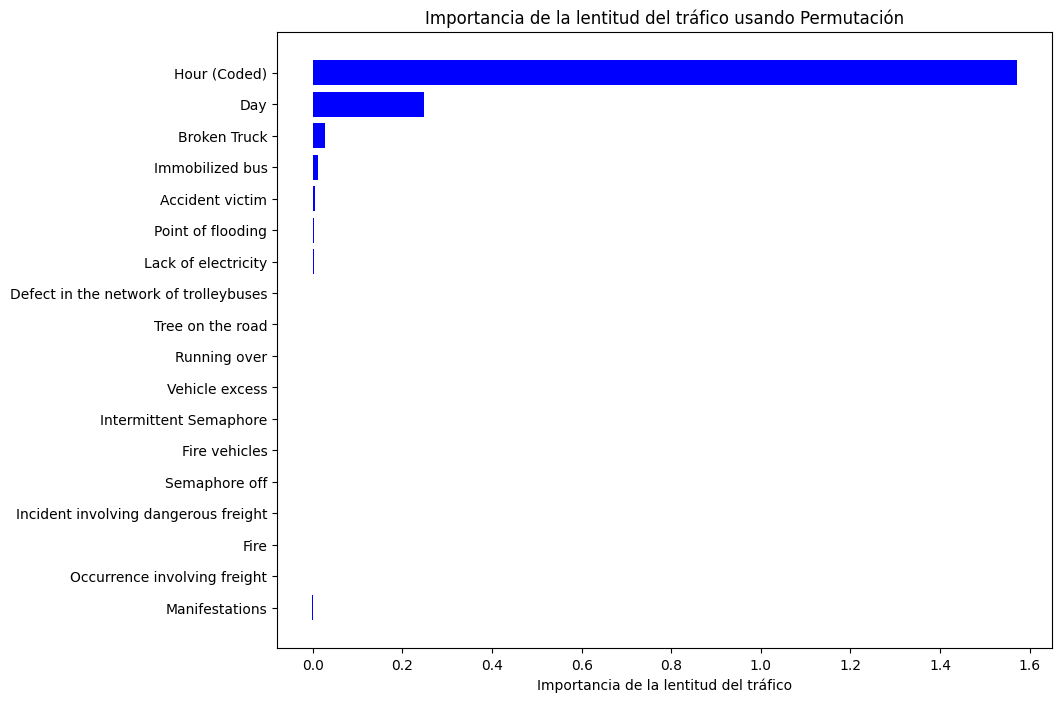

In [1137]:
result = permutation_importance(pipelineXGB, Xtest, ytest, n_repeats=10, random_state=42, n_jobs=-1)

importances = result.importances_mean
feature_names = Xtest.columns

sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], color='blue', align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importancia de la lentitud del tráfico')
plt.title('Importancia de la lentitud del tráfico usando Permutación')
plt.show()